In [1]:
# import needed libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [1]:
# define ODE model
def selkov (y0,t,parameters):
    # parameters
    alpha = parameters['alpha']
    beta  = parameters['beta'] 
    gamma = parameters['gamma'] 
    # variables
    x = y0[0]
    y = y0[1]
    # ODEs
    dxdt = alpha - beta*x*y**2 
    dydt = beta*x*y**2 - gamma*y
    return [dxdt, dydt]

In [2]:
# define time, initial conditions and parameters for integration

# solve ODE model

# plot solution 
# subplot 1: time series

# subplot 2: phase space 

Text(0.5, 1.0, 'phase space')

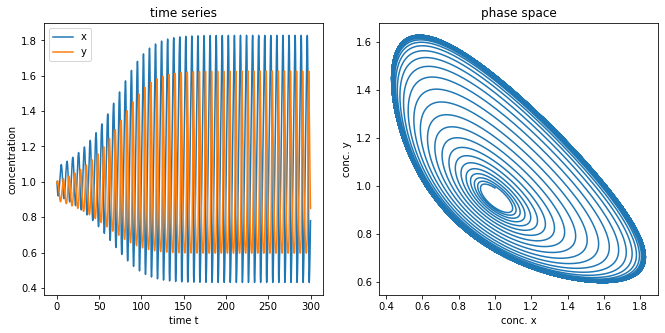

In [55]:
# what happens as gamma is changed gradually?

# solve ODE model


# plot solution 
# subplot 1: time series

# subplot 2: phase space 

Text(0.5, 0.98, 'LIMIT CYCLE OSCILLATIONS: different initial conditions are ATTRACTED to the same cycle\n(limit cycles are ATTRACTORS)')

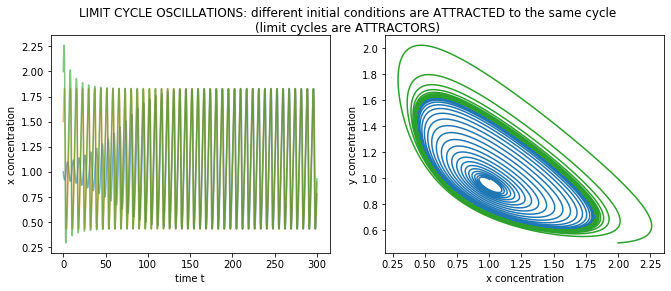

In [59]:
# what happens with different initial conditions? 

# plot 
# subplot 1: concentration of x

# subplot 2: phase portraits for the different solutions 